# QGrid

https://github.com/quantopian/qgrid

In [ ]:
import pandas as pd
import numpy as np
import string

In [ ]:
df=pd.read_csv('datasets/student-por.csv', sep=';')
df.head()

In [ ]:
import qgrid

In [ ]:
q_df=qgrid.show_grid(df, show_toolbar=True)
q_df

# iTables

https://github.com/mwouts/itables

In [ ]:
from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

from itables import show

import world_bank_data as wb

In [ ]:
df_c = wb.get_countries()
show(df_c)

In [ ]:
# descargar en html

# Jupyter DataTables

https://github.com/CermakM/jupyter-datatables

In [ ]:
from jupyter_nbutils import utils

# install jupyter-require extension
utils.install_nbextension('jupyter_require', overwrite=True)  # note there is an underscore, it's Python module name

# load and enable the extension
utils.load_nbextension('jupyter-require', enable=True)

from jupyter_datatables import init_datatables_mode

%load_ext jupyter_require
%requirejs d3 https://d3js.org/d3.v5.min

init_datatables_mode()

In [ ]:
df = pd.DataFrame(np.abs(np.random.randn(50, 5)), columns=list(string.ascii_uppercase[:5]))
display(df)

# ipyvolume

https://github.com/maartenbreddels/ipyvolume

In [ ]:
import ipyvolume

In [ ]:
data=ipyvolume.datasets.hdz2000.fetch()

In [ ]:
ipyvolume.volshow(data.data, lighting=True, level=[.4,.6,.9])

# bqplot

https://github.com/bqplot/bqplot

In [ ]:
from bqplot import pyplot as plt

In [ ]:
plt.figure(title='Plot')
plt.plot(np.arange(100), np.cumsum(np.random.randn(100)*100.0))
plt.show()

# livelossplot

https://github.com/stared/livelossplot

In [1]:
%matplotlib inline

from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

# raw keras
from livelossplot import PlotLossesKeras

# tensorflow.keras
# from livelossplot import PlotLossesKerasTF

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

In [9]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',  # 'mean_squared_error'
              metrics=['accuracy', 'mean_squared_error'])

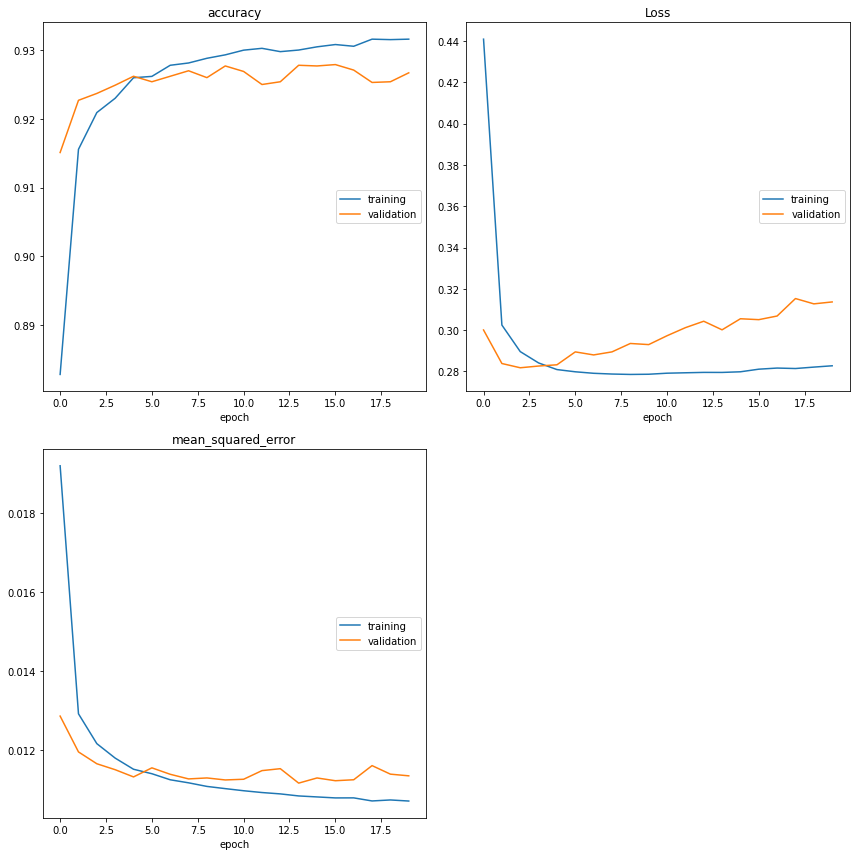

accuracy
	training         	 (min:    0.883, max:    0.932, cur:    0.932)
	validation       	 (min:    0.915, max:    0.928, cur:    0.927)
Loss
	training         	 (min:    0.279, max:    0.441, cur:    0.283)
	validation       	 (min:    0.282, max:    0.315, cur:    0.314)
mean_squared_error
	training         	 (min:    0.011, max:    0.019, cur:    0.011)
	validation       	 (min:    0.011, max:    0.013, cur:    0.011)


In [10]:
model.fit(X_train, Y_train,
          epochs=20,
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()],
          verbose=False)

# TensorWatch

https://github.com/microsoft/tensorwatch

In [13]:
%matplotlib notebook
import tensorwatch as tw

In [14]:
train = tw.WatcherClient(port=0)
test = tw.WatcherClient(port=1)

<IPython.core.display.Javascript object>


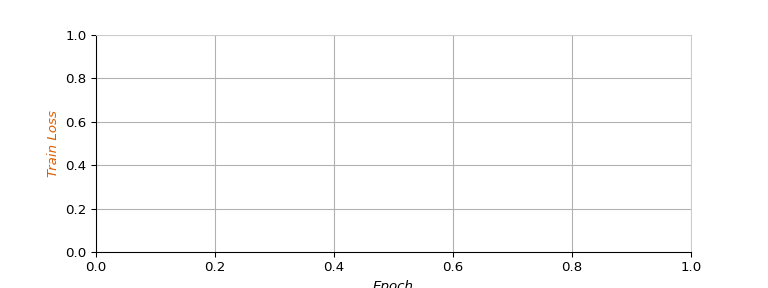

In [15]:
loss_stream = train.create_stream(expr='lambda d:(d.metrics.epochf, d.metrics.batch_loss)', event_name='batch')
loss_plot = tw.Visualizer(loss_stream, vis_type='line', xtitle='Epoch', ytitle='Train Loss')
loss_plot.show()

<IPython.core.display.Javascript object>


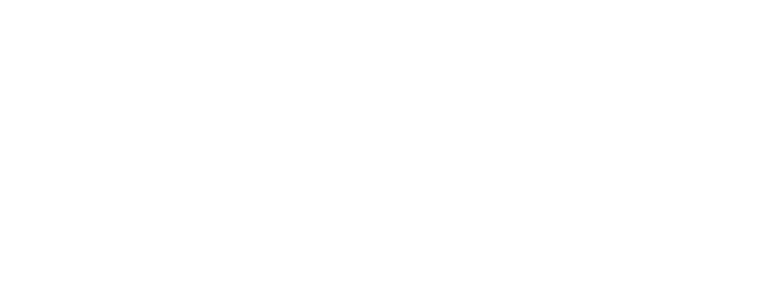

In [16]:
rand_pred = train.create_stream(expr="topk_all(l, \
            batch_vals=lambda b: (b.batch.loss_all, (b.batch.input, b.batch.output), b.batch.target), \
            out_f=image_class_outf, order='rnd')", event_name='batch', throttle=2)
rand_pred_plot = tw.Visualizer(rand_pred, vis_type='image', title="Random Predictions")
rand_pred_plot.show()